In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
torch.manual_seed(1)

In [2]:
# HYPERPARAMETERS
TIME_STEP = 10
INPUT_SIZE = 1
LR = 0.02


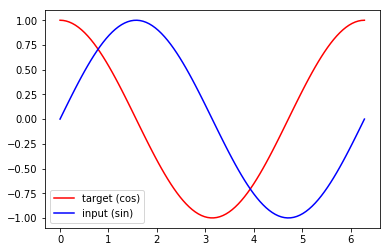

In [3]:
# show data
steps = np.linspace(0, np.pi*2, 100, dtype=np.float32)
x_np = np.sin(steps)    # float32 for converting torch FloatTensor
y_np = np.cos(steps)
plt.plot(steps, y_np, 'r-', label='target (cos)')
plt.plot(steps, x_np, 'b-', label='input (sin)')
plt.legend(loc='best')
plt.show()

In [4]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        self.rnn = nn.RNN(
            input_size=INPUT_SIZE,
            hidden_size=32,
            num_layers=1,
            batch_first=True,
        )
        self.out = nn.Linear(32, 1)

    def forward(self, x, h_state):
        # x (batch, time_step, input_size)
        # h_state (n_layers, batch, hidden_size)
        # r_out (batch, time_step, hidden_size)
        r_out, h_state = self.rnn(x, h_state)

        outs = []  # save all predictions
        for time_step in range(r_out.size(1)):
            # calculate output for each time step
            outs.append(self.out(r_out[:, time_step, :]))

        return torch.stack(outs, dim=1), h_state

In [5]:
rnn = RNN()
print(rnn)

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (out): Linear(in_features=32, out_features=1)
)


In [6]:
optimizer = torch.optim.Adam(
    rnn.parameters(), lr=LR)  # optimize all cnn parameters
loss_func = nn.MSELoss()

In [7]:
h_state = None # for initial hidden state

In [8]:
plt.figure(1, figsize=(12, 5))
plt.ion()

20


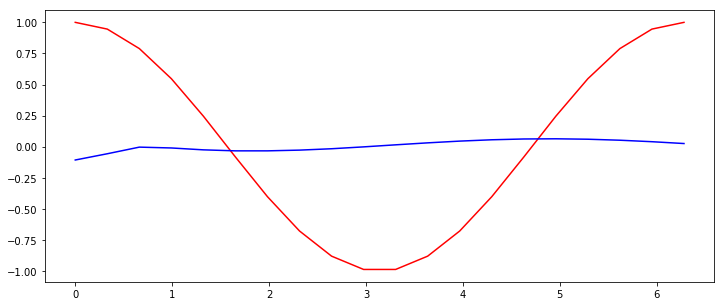

20


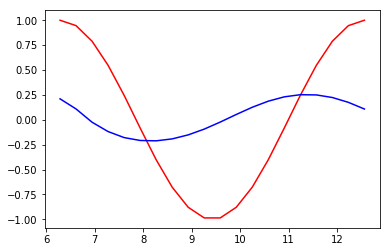

30


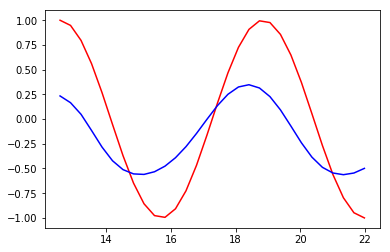

30


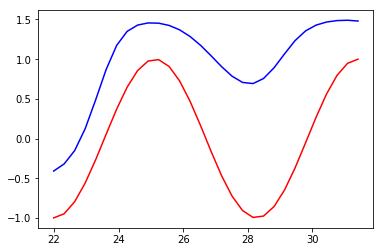

10


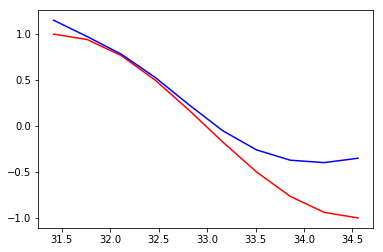

30


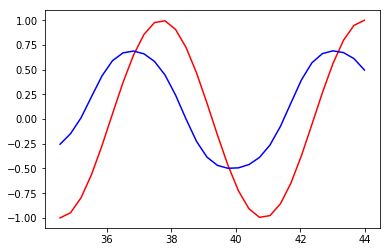

20


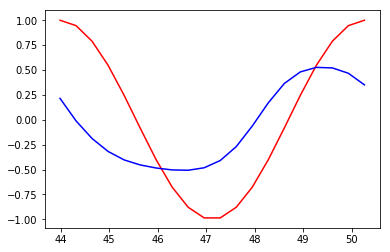

20


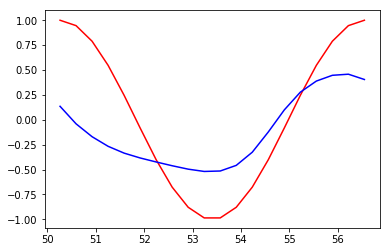

10


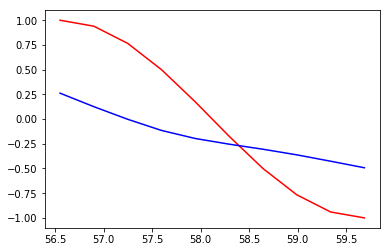

20


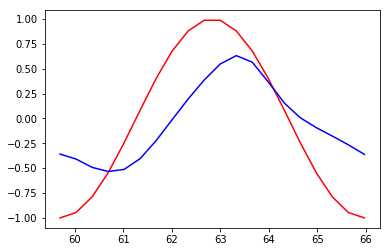

30


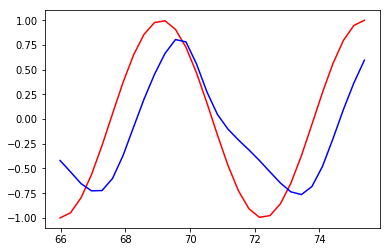

10


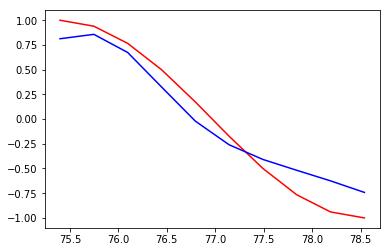

20


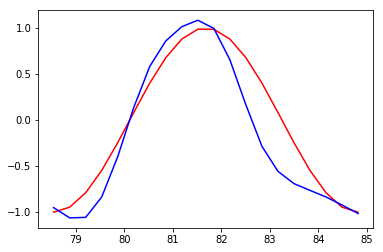

20


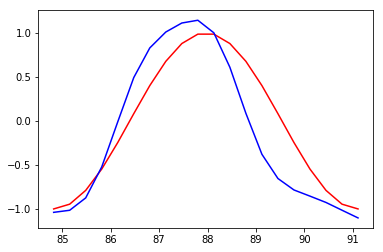

30


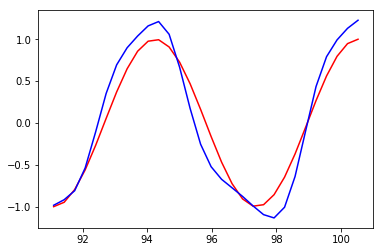

10


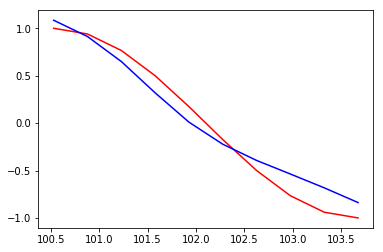

30


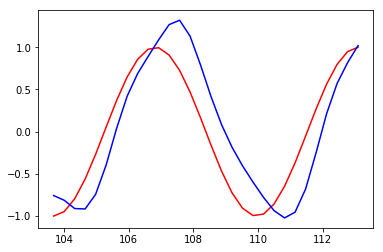

30


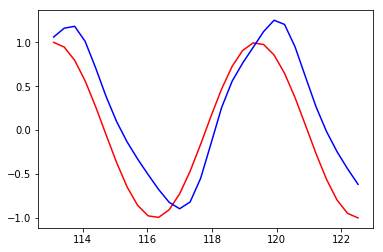

20


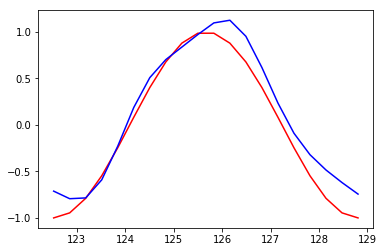

20


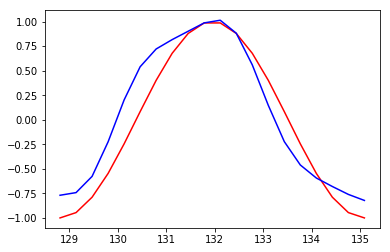

20


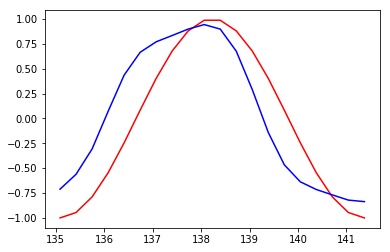

20


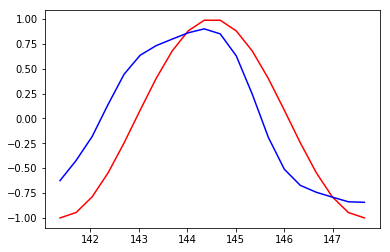

20


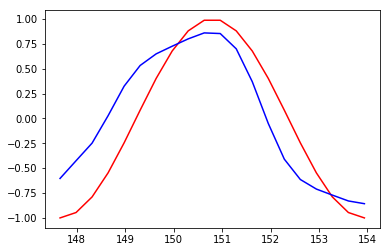

30


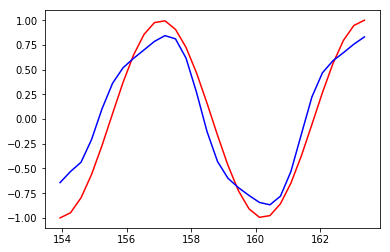

20


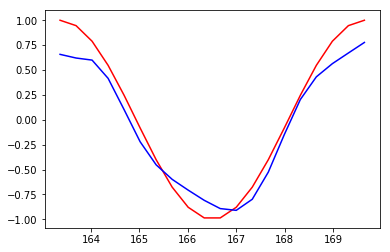

30


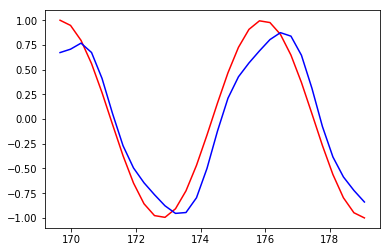

20


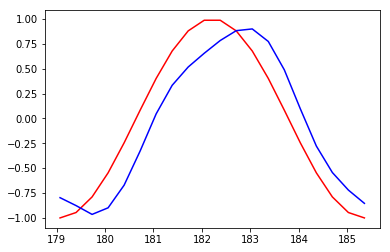

20


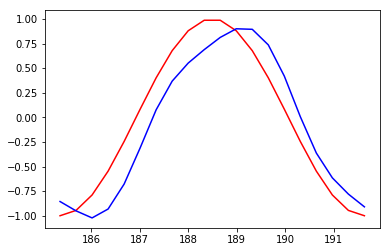

20


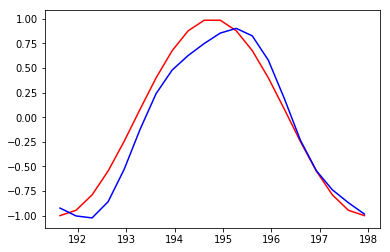

20


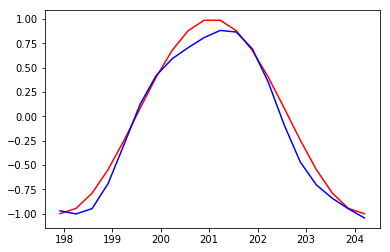

10


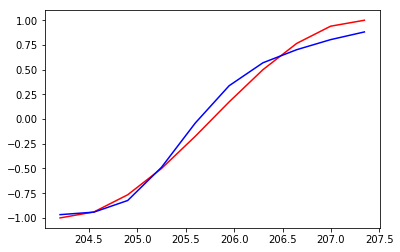

10


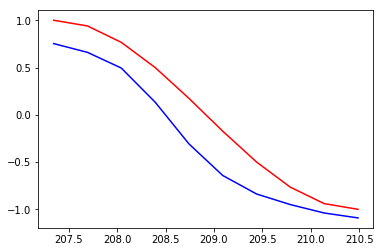

10


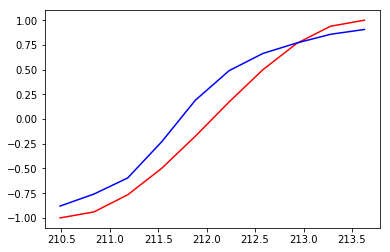

30


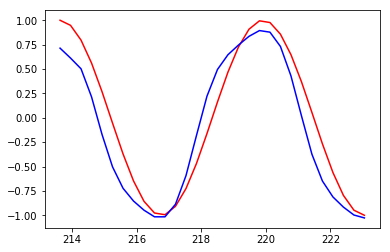

30


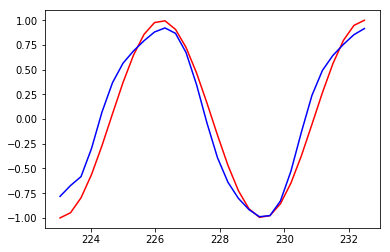

10


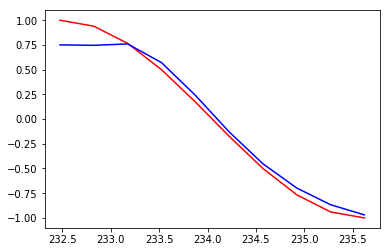

20


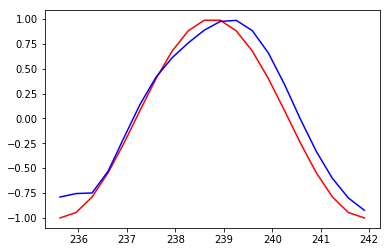

10


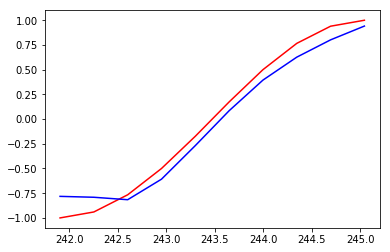

20


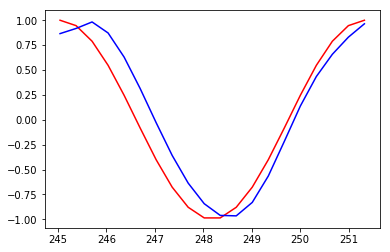

10


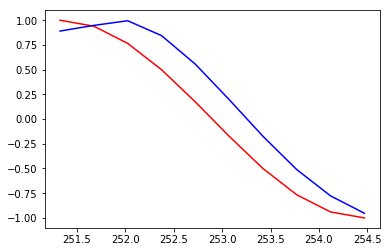

10


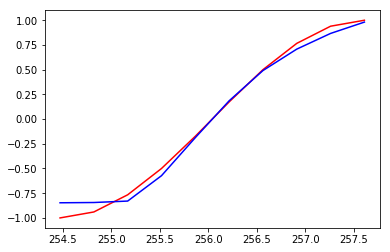

30


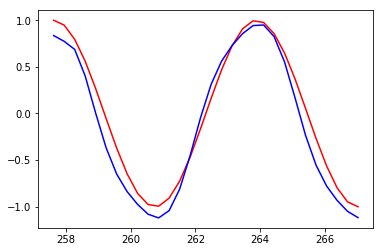

20


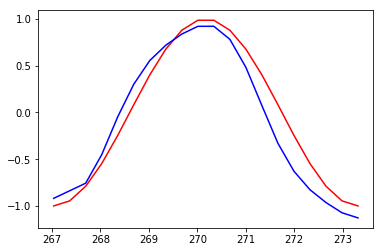

20


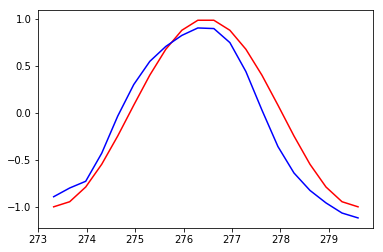

10


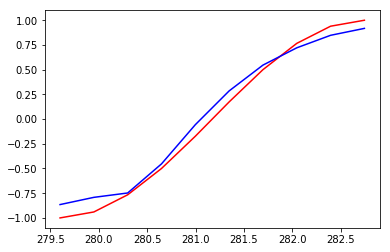

20


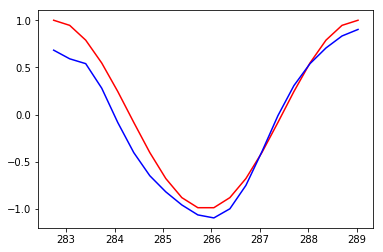

10


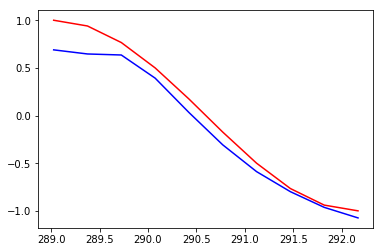

30


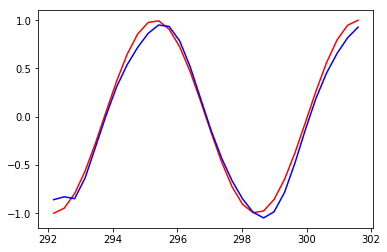

20


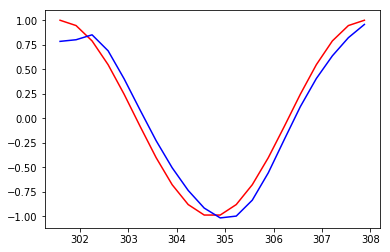

20


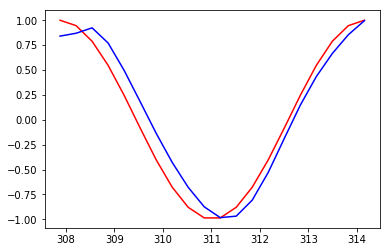

30


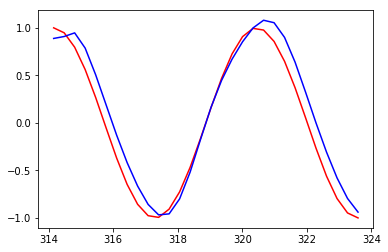

30


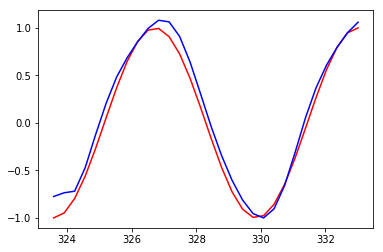

20


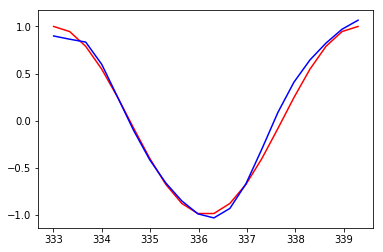

30


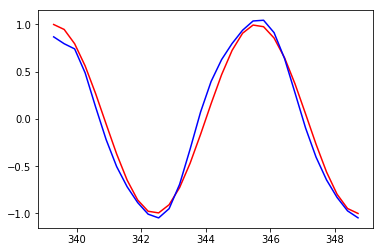

30


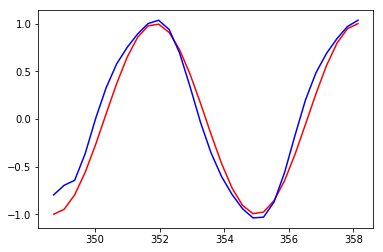

20


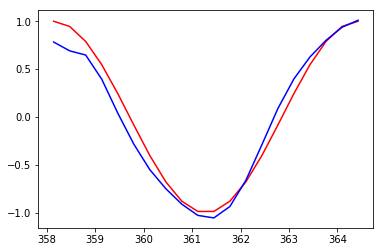

20


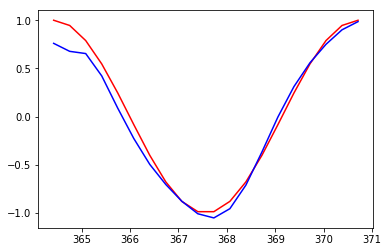

20


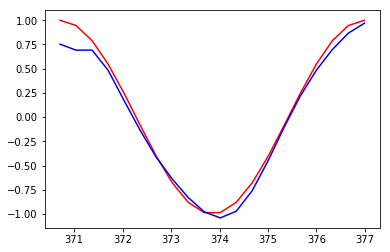

20


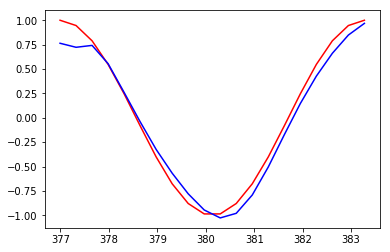

30


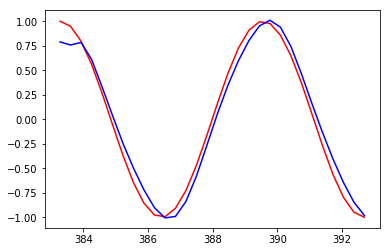

In [8]:
h_state = None  # for initial hidden state

plt.figure(1, figsize=(12, 5))
plt.ion()  # continuously plot

########################  Below is different #########################

################ static time steps ##########
# for step in range(60):
#     start, end = step * np.pi, (step+1)*np.pi   # time steps
#     # use sin predicts cos
#     steps = np.linspace(start, end, 10, dtype=np.float32)

################ dynamic time steps #########
step = 0
for i in range(60):
    dynamic_steps = np.random.randint(1, 4)  # has random time steps
    start, end = step * np.pi, (
        step + dynamic_steps) * np.pi  # different time steps length
    step += dynamic_steps

    # use sin to predict cos
    steps = np.linspace(start, end, 10 * dynamic_steps, dtype=np.float32)

    #######################  Above is different ###########################

    print(len(steps))  # print how many time step feed to RNN

    x_np = np.sin(steps)  # float32 for converting torch FloatTensor
    y_np = np.cos(steps)

    x = Variable(torch.from_numpy(x_np[
        np.newaxis, :, np.newaxis]))  # shape (batch, time_step, input_size)
    y = Variable(torch.from_numpy(y_np[np.newaxis, :, np.newaxis]))

    prediction, h_state = rnn(x, h_state)  # rnn output
    # !! next step is important !!
    h_state = Variable(
        h_state.data
    )  # repack the hidden state, break the connection from last iteration

    loss = loss_func(prediction, y)  # cross entropy loss
    optimizer.zero_grad()  # clear gradients for this training step
    loss.backward()  # backpropagation, compute gradients
    optimizer.step()  # apply gradients

    # plotting
    plt.plot(steps, y_np.flatten(), 'r-')
    plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
    plt.draw()
    plt.pause(0.05)

plt.ioff()
plt.show()

In [9]:
%load_ext version_information
%version_information torch, numpy, matplotlib

Software versions
Python 3.6.4 64bit [GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]
IPython 6.2.1
OS Linux 4.13.0 32 generic x86_64 with debian stretch sid
torch 0.3.0.post4
numpy 1.14.0
matplotlib 2.1.2
Mon Feb 12 20:28:21 2018 CST